# Astroplan Plotting Examples - Sky Plot

To generate sky plots with `Astroplan`, use the `plot_sky` function.  

This function takes, at minimum, a `Target`, an `Observer` and a `Time` object as input.  
Optional arguments include an `Axes` object and a style dictionary.  

`plot_sky` will return an `Axes` object with target positions plotted at the time(s) specified.  You can further manipulate the returned `Axes` object, or simply print the plot to your display or save it as a file. 

## General guidelines.

Most users will want to see the positions of several `Target`s with respect to an `Observer`'s zenith, as well as the positions of familiar stars or other objects to act as guides.  Since `plot_sky` allows you to pass in only one `Target` at a time (like `plot_airmass` and `plot_parallactic`), you have to reuse the returned `Axes` object to map multiple objects on the same plot. 

However, you do have the option of passing in a `Time` object that contains as many times as you like.  This means that you can see the position of celestial bodies at a single instance in time or map them over the course of a night.

Note that whichever option you take, you must use the same `Observer` when reusing an `Axes` object.  

`plot_sky` currently produces plots in altitude/azimuth coordinates only. 

## Making a sky plot for one instance in time.

Target: Polaris
Altitudes & Plot Altitudes:
[ 71.73663304]
[ 71.73663304]
Azimuths & Plot Azimuths:
[ 0.00570048]
[ 0.00570048]


Target: Altair
Altitudes & Plot Altitudes:
[ 48.52806493]
[ 48.52806493]
Azimuths & Plot Azimuths:
[ 1.67781994]
[ 1.67781994]


Target: Vega
Altitudes & Plot Altitudes:
[ 32.66006223]
[ 32.66006223]
Azimuths & Plot Azimuths:
[ 0.81740677]
[ 0.81740677]


Target: Deneb
Altitudes & Plot Altitudes:
[ 56.48505161]
[ 56.48505161]
Azimuths & Plot Azimuths:
[ 0.8371968]
[ 0.8371968]




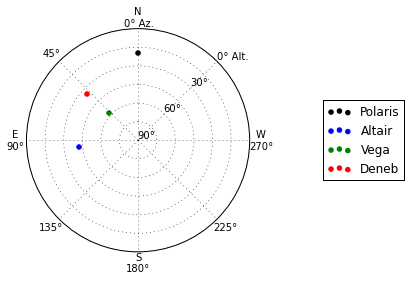

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import astropy.units as u
from astropy.coordinates import EarthLocation, SkyCoord
from pytz import timezone
from astropy.time import Time

from astroplan import Observer
from astroplan import FixedTarget
from astroplan.plots import plot_sky

# Set up Observer, Target and observation time objects. 
longitude = '-155d28m48.900s'
latitude = '+19d49m42.600s'
elevation = 4163 * u.m
location = EarthLocation.from_geodetic(longitude, latitude, elevation)

observer = Observer(name='Subaru Telescope',
               location=location,
               pressure=0.615 * u.bar,
               relative_humidity=0.11,
               temperature=0 * u.deg_C,
               timezone=timezone('US/Hawaii'),
               description="Subaru Telescope on Mauna Kea, Hawaii")

coordinates = SkyCoord('02h31m49.09s', '+89d15m50.8s', frame='icrs')
polaris = FixedTarget(name='Polaris', coord=coordinates)

coordinates = SkyCoord('19h50m47.6s', '+08d52m12.0s', frame='icrs')
altair = FixedTarget(name='Altair', coord=coordinates)
altair_style = {'marker': 'o', 'color': 'b'}

coordinates = SkyCoord('18h36m56.5s', '+38d47m06.6s', frame='icrs')
vega = FixedTarget(name='Vega', coord=coordinates)
vega_style = {'marker': 'o', 'color': 'g'}

coordinates = SkyCoord('20h41m25.9s', '+45d16m49.3s', frame='icrs')
deneb = FixedTarget(name='Deneb', coord=coordinates)
deneb_style = {'marker': 'o', 'color': 'r'}

observe_time = Time(['2015-03-15 15:30:00'])

plot_sky(polaris, observer, observe_time)
plot_sky(altair, observer, observe_time, style_kwargs=altair_style)
plot_sky(vega, observer, observe_time, style_kwargs=vega_style)
plot_sky(deneb, observer, observe_time, style_kwargs=deneb_style)

plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

## Showing the movement of celestial bodies over time.

You make a plot that shows how your targets move over some period in much the same way you make a plot for one instance of time.  You simply input a vector instead of a scalar `Time` object--that is, just populate your `Time` object with multiple times.

You can center the window of time covered by your `Time` object at one particular instance...

Target: Altair
Altitudes & Plot Altitudes:
[ 83.76202518  69.70860606  55.57608238  41.52330586  27.84526172
  15.80236614  12.82596307  22.98313246  36.32325396  50.28871988]
[ 83.76202518  69.70860606  55.57608238  41.52330586  27.84526172
  15.80236614  12.82596307  22.98313246  36.32325396  50.28871988]
Azimuths & Plot Azimuths:
[ 1.44991027  1.53447674  1.62518783  1.74000297  1.92601907  2.37464942
  3.54768414  4.24186612  4.48644543  4.6192499 ]
[ 1.44991027  1.53447674  1.62518783  1.74000297  1.92601907  2.37464942
  3.54768414  4.24186612  4.48644543  4.6192499 ]




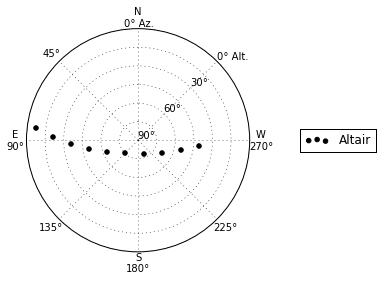

In [3]:
import numpy as np

observe_time = Time('2015-03-15 17:00:00')
observe_time = observe_time + np.linspace(-4, 5, 10)*u.hour

plot_sky(altair, observer, observe_time)

plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show()

...or, if you know the start and end times of your observation run, you can use a `DeltaTime` object.

Target: Vega
Altitudes & Plot Altitudes:
[ 43.61868096  27.77145616  19.97283475  28.58025262  44.61677378
  62.0923078   79.35867778]
[ 43.61868096  27.77145616  19.97283475  28.58025262  44.61677378
  62.0923078   79.35867778]
Azimuths & Plot Azimuths:
[ 0.93760347  0.7015436   6.25570789  5.5576655   5.33979218  5.30888278
  5.36333562]
[ 0.93760347  0.7015436   6.25570789  5.5576655   5.33979218  5.30888278
  5.36333562]




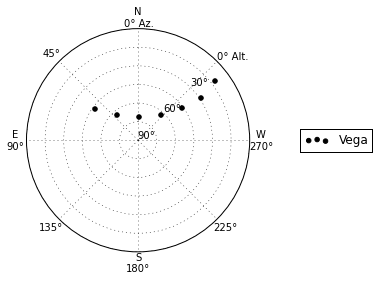

In [4]:
start_time = Time('2015-03-15 14:30:00')
end_time = Time('2015-03-15 23:30:00')
delta_t = end_time - start_time
observe_time = start_time + delta_t*np.linspace(0, 1, 7)

plot_sky(vega, observer, observe_time)

plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show()

## Changing style options.

You can change the `linestyle` and `color` properties of any data set by setting the `style_kwargs` option, as seen above in the various examples.  

One situation in which this is particularly useful is the plotting of guide positions, such as a few familiar stars or any body used in calibrating your telescope.  You can also use this feature to set apart different types of targets, etc.

Target: Polaris
Altitudes & Plot Altitudes:
[ 71.80107212  71.809072    71.77167823  71.69142263  71.57374499
  71.42663565  71.26010718  71.08552638  70.91484765  70.75979669]
[ 71.80107212  71.809072    71.77167823  71.69142263  71.57374499
  71.42663565  71.26010718  71.08552638  70.91484765  70.75979669]
Azimuths & Plot Azimuths:
[  6.28101043e+00   1.05567827e-03   4.21500120e-03   7.08901402e-03
   9.48233437e-03   1.12312528e-02   1.22148568e-02   1.23635778e-02
   1.16645197e-02   1.01630663e-02]
[  6.28101043e+00   1.05567827e-03   4.21500120e-03   7.08901402e-03
   9.48233437e-03   1.12312528e-02   1.22148568e-02   1.23635778e-02
   1.16645197e-02   1.01630663e-02]


Target: Altair
Altitudes & Plot Altitudes:
[ 83.76202518  69.70860606  55.57608238  41.52330586  27.84526172
  15.80236614  12.82596307  22.98313246  36.32325396  50.28871988]
[ 83.76202518  69.70860606  55.57608238  41.52330586  27.84526172
  15.80236614  12.82596307  22.98313246  36.32325396  50.28871988]
Azimu

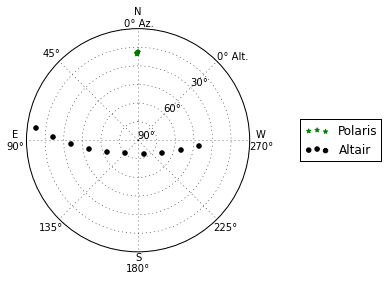

In [5]:
guides_style = {'marker': '*', 'color': 'g'}

observe_time = Time('2015-03-15 17:00:00')
observe_time = observe_time + np.linspace(-4, 5, 10)*u.hour

plot_sky(polaris, observer, observe_time, style_kwargs=guides_style)
plot_sky(altair, observer, observe_time)

plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show()

## Warning - Objects below horizon.

Note that in the case of an object being under the horizon (negative altitude) for any of the times in your input `Time` object, `plot_sky` will warn you.  Your object(s) will not show on the plot for that particular time, but `plot_sky` will still map any positions that are above the horizon.

Target: Pollux
Altitudes & Plot Altitudes:
[ 100.2689353   116.5088243   128.574273    133.12675942  128.17103888
  115.85534715   99.48874631   81.15595993   61.78102493   41.92827833]
[ 100.2689353   116.5088243   128.574273    133.12675942  128.17103888
  115.85534715   99.48874631   81.15595993   61.78102493   41.92827833]
Azimuths & Plot Azimuths:
[ 5.31299047  5.52471577  5.85100612  0.01042536  0.44951225  0.77001592
  0.97759529  1.11075967  1.19188354  1.21795555]
[ 5.31299047  5.52471577  5.85100612  0.01042536  0.44951225  0.77001592
  0.97759529  1.11075967  1.19188354  1.21795555]




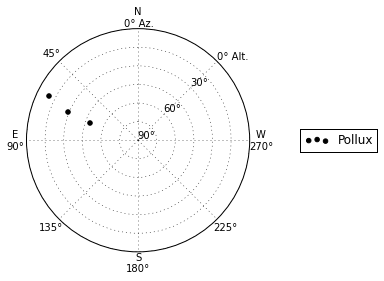

In [6]:
coordinates = SkyCoord('07h45m19.4s', '+28d01m35s', frame='icrs')
pollux = FixedTarget(name='Pollux', coord=coordinates)

start_time = Time('2015-01-15 18:00:00')
end_time = Time('2015-01-16 07:30:00')
delta_t = end_time - start_time
observe_time = start_time + delta_t*np.linspace(0, 1, 10)

plot_sky(pollux, observer, observe_time)

plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show()

# Weird errors - related to plot_sky in any way? -- GONE

Target: Polaris
Altitudes & Plot Altitudes:
[ 71.71515725]
[ 71.71515725]
Azimuths & Plot Azimuths:
[ 6.27680444]
[ 6.27680444]


Target: Altair
Altitudes & Plot Altitudes:
[ 102.72365101]
[ 102.72365101]
Azimuths & Plot Azimuths:
[ 1.32454637]
[ 1.32454637]


Target: Vega
Altitudes & Plot Altitudes:
[ 76.86095923]
[ 76.86095923]
Azimuths & Plot Azimuths:
[ 0.93202538]
[ 0.93202538]


Target: Deneb
Altitudes & Plot Altitudes:
[ 95.26101349]
[ 95.26101349]
Azimuths & Plot Azimuths:
[ 0.66669695]
[ 0.66669695]




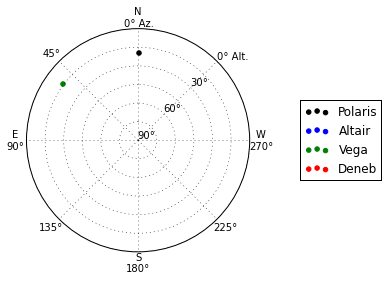

In [7]:
coordinates = SkyCoord('02h31m49.09s', '+89d15m50.8s', frame='icrs')
polaris = FixedTarget(name='Polaris', coord=coordinates)

coordinates = SkyCoord('19h50m47.6s', '+08d52m12.0s', frame='icrs')
altair = FixedTarget(name='Altair', coord=coordinates)
altair_style = {'marker': 'o', 'color': 'b'}

coordinates = SkyCoord('18h36m56.5s', '+38d47m06.6s', frame='icrs')
vega = FixedTarget(name='Vega', coord=coordinates)
vega_style = {'marker': 'o', 'color': 'g'}

coordinates = SkyCoord('20h41m25.9s', '+45d16m49.3s', frame='icrs')
deneb = FixedTarget(name='Deneb', coord=coordinates)
deneb_style = {'marker': 'o', 'color': 'r'}

observe_time = Time(['2015-01-15 15:30:00'])

plot_sky(polaris, observer, observe_time)
plot_sky(altair, observer, observe_time, style_kwargs=altair_style)
plot_sky(vega, observer, observe_time, style_kwargs=vega_style)
plot_sky(deneb, observer, observe_time, style_kwargs=deneb_style)

plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show()